# 🧹 Machine Learning Notebook 📚

Welcome to this Jupyter Notebook! 🎉

In this notebook, we will be going through the process of cleaning up a database, then preparing it for machine learning (ML), and finally running multiple algorithms to test which is more precise. This involves identifying and correcting errors in the dataset, dealing with missing values, normalizing and splitting test and training dataframes. 📊

We will be using powerful Python libraries such as `pandas` for data manipulation, `numpy` for numerical operations, `tabulate` for printing tables and `sklearn`'s `SimpleImputer` and `StandardScaler` for handling missing values and standardizing data respectively. 🧮

For machine learning specifically, we will be using `mean_squared_error` for calculating the precision of our models, and `train_test_split` to create our testing/training set pairs. 🎯

Our 3 regressors to use are `DecisionTreeRegressor` `RandomForestRegressor` and `LinearRegressor`. These are powerful tools that will help us predict outcomes based on our data. 🤖

So, let's dive in and start cleaning! 🏊‍♀️


In [180]:
# Import necessary libraries for data science and data cleanup
import pandas as pd
import numpy as np
import tabulate

from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from scipy.stats import zscore # for outlier detection
from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.metrics import mean_squared_error # for calculating error



In [202]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [182]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In this case, we can tell that our `diagnosis` column will be our label for ML 🎯, while every other column (apart from `id`) corresponds to either the worst observation 👎, the mean observation 📊, or the standard error $ (\frac{\sigma}{\sqrt{n}}) $ 

As such, let's numerize `['diagnosis']` with M = 1 (malignant) 😷, and B = 0 (benign) 😊


In [183]:
df['diagnosis'] = pd.to_numeric(df['diagnosis'].replace({'M': 1, 'B': 0}))
df['diagnosis'].describe()

C:\Users\nuxap\AppData\Local\Temp\ipykernel_4624\57912900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = pd.to_numeric(df['diagnosis'].replace({'M': 1, 'B': 0}))


count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

🔍 Let's also check for duplicates 🔎


In [184]:
df['id'].duplicated().sum()

0

Then let's tabulate all dtypes, null values and outliers 📊🔍📈


In [185]:
# Get amount of null values for each column
null_values = df.isnull().sum()
# Get the data types of each column
data_types = df.dtypes

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Define a function to detect outliers using the IQR method
def detect_outliers(series):
    z_scores = zscore(series)
    outliers = np.abs(z_scores) > 3
    return outliers.sum()
# Apply the function to detect outliers only on numeric columns
outliers = numeric_df.apply(detect_outliers)

# Tabulate the results
summary_table = pd.DataFrame({'Data Types': data_types, 'Null Values': null_values, 'Outliers': outliers})
print(tabulate.tabulate(summary_table, headers='keys', tablefmt='pretty'))


+-------------------------+------------+-------------+----------+
|                         | Data Types | Null Values | Outliers |
+-------------------------+------------+-------------+----------+
|           id            |   int64    |      0      |    11    |
|        diagnosis        |   int64    |      0      |    0     |
|       radius_mean       |  float64   |      0      |    5     |
|      texture_mean       |  float64   |      0      |    4     |
|     perimeter_mean      |  float64   |      0      |    7     |
|        area_mean        |  float64   |      0      |    8     |
|     smoothness_mean     |  float64   |      0      |    5     |
|    compactness_mean     |  float64   |      0      |    9     |
|     concavity_mean      |  float64   |      0      |    9     |
|   concave points_mean   |  float64   |      0      |    6     |
|      symmetry_mean      |  float64   |      0      |    5     |
| fractal_dimension_mean  |  float64   |      0      |    7     |
|        r

Our database has:
* only floats (except of course, our `id` and `label` columns) 🧮
* no null values 🚫
* a very varied amount of *outliers* 📊

as such I'd rather run it as-is. 🏃‍♀️

______________________

# ML preparation 🤖


We drop our `id` column, as it's not useful for our ML purposes. 🗑️ As well as separating our `label` column. 🏷️


In [186]:
# Drop the 'id' column
df = df.drop(['id'], axis=1)

# Separate the 'diagnosis' column as our label
labels = df['diagnosis']
df = df.drop(['diagnosis'], axis=1)


In this step, we create different, normalized dataframes, for testing and experimenting with our regression results. This is an important step in our data analysis process 📊🧪🔬.

Additionally, we'll do the same thing for subsets of our dataframe. We'll create one for `_means` only, another for `_worsts` only, and another for standard errors (`_se`) only. This will allow us to test which is more precise at predicting malevolent vs benevolent tumors 📈🔎📚.


In [187]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [188]:
df_means = df.filter(regex='_mean$')
df_se = df.filter(regex='_se$')
df_worst = df.filter(regex='_worst$')

# fit and transform the data
df_means = scaler.fit_transform(df_means)
df_se = scaler.fit_transform(df_se)
df_worst = scaler.fit_transform(df_worst)

# convert the numpy arrays back to dataframes
df_means = pd.DataFrame(df_means)
df_se = pd.DataFrame(df_se)
df_worst = pd.DataFrame(df_worst)


Here are the dataframes that will be used for ML regression: 📊

1. `df`: This is the **original dataframe** that contains all the data. It includes various descriptive statistics such as 'radius_mean', 'radius_se', 'radius_worst', etc. 📝

2. `df_normalized`: This dataframe is a **normalized** version of the original dataframe `df`. All the values in this dataframe are scaled using `StandardScaler()` from `sklearn`. 🔄

3. `df_means`: This dataframe is a **subset** of the original dataframe `df`. It only contains the **mean** values of the features. 🎯

4. `df_means_normalized`: This dataframe is a **normalized** version of `df_means`. 🔄

and so on with each metric in `df`. 🔍


In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



We set up the 🎯 **target variable**, define ⚙️ **hyperparameters**, create a 📝 **list of all our dataframes** (each representing a different version of the data), specifying the 🤖 machine learning models to use, and naming each dataframe for easy reference. 📚

In [190]:

# Define the target variable
y = labels

# Define the hyperparameters
hyperparameters = [2, 3, 4, 5, 6]

# Create a list of all dataframes
dfs = [df, df_normalized, df_means, df_means_normalized, df_se, df_se_normalized, df_worst, df_worst_normalized]

# Create a list of all regressors
regressors = [DecisionTreeRegressor, LinearRegression, RandomForestRegressor]

# Create a list of dataframe names
df_names = ['df', 'df_normalized', 'df_means', 'df_means_normalized', 'df_se', 'df_se_normalized', 'df_worst', 'df_worst_normalized']

We split 🍴, train 🚂 and test 🧪 each dataframe with each regressor, under each set of hyperparameters previously defined. 🎯

In [191]:
# Initialize the results list for tabulating later
results = []

# Loop over all dataframes
for df, df_name in zip(dfs, df_names):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

    # Loop over all regressors
    for regressor in regressors:
        # Check if the regressor is LinearRegression
        if regressor == LinearRegression:
            # LinearRegression does not have hyperparameters so we can initialize it directly
            model = regressor()
            
            # Fit the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate the mean squared error
            mse = mean_squared_error(y_test, y_pred)

            # Append the results to the results list
            results.append([df_name, regressor.__name__, None, mse]) # None is used as a placeholder for hyperparameters since LinearRegression does not have hyperparameters
            print(f"Finished {df_name} with {regressor.__name__}")
            
        else:
            # Loop over all hyperparameters for the other 2 regressors
            for hyperparameter in hyperparameters:
                # Initialize the regressor
                if regressor == DecisionTreeRegressor:
                    model = regressor(max_depth=hyperparameter, random_state=42)
                elif regressor == RandomForestRegressor:
                    model = regressor(n_estimators=int(hyperparameter), random_state=41)

                # Fit the model
                model.fit(X_train, y_train)

                # Make predictions
                y_pred = model.predict(X_test)

                # Calculate the mean squared error
                mse = mean_squared_error(y_test, y_pred)

                # Append the results to the results list
                results.append([df_name, regressor.__name__, hyperparameter, mse])
                print(f"Finished {df_name} with {regressor.__name__} and hyperparameter {hyperparameter}")

                


Finished df with DecisionTreeRegressor and hyperparameter 2
Finished df with DecisionTreeRegressor and hyperparameter 3
Finished df with DecisionTreeRegressor and hyperparameter 4
Finished df with DecisionTreeRegressor and hyperparameter 5
Finished df with DecisionTreeRegressor and hyperparameter 6
Finished df with LinearRegression
Finished df with RandomForestRegressor and hyperparameter 2
Finished df with RandomForestRegressor and hyperparameter 3
Finished df with RandomForestRegressor and hyperparameter 4


Finished df with RandomForestRegressor and hyperparameter 5
Finished df with RandomForestRegressor and hyperparameter 6
Finished df_normalized with DecisionTreeRegressor and hyperparameter 2
Finished df_normalized with DecisionTreeRegressor and hyperparameter 3
Finished df_normalized with DecisionTreeRegressor and hyperparameter 4
Finished df_normalized with DecisionTreeRegressor and hyperparameter 5
Finished df_normalized with DecisionTreeRegressor and hyperparameter 6
Finished df_normalized with LinearRegression
Finished df_normalized with RandomForestRegressor and hyperparameter 2
Finished df_normalized with RandomForestRegressor and hyperparameter 3
Finished df_normalized with RandomForestRegressor and hyperparameter 4
Finished df_normalized with RandomForestRegressor and hyperparameter 5
Finished df_normalized with RandomForestRegressor and hyperparameter 6
Finished df_means with DecisionTreeRegressor and hyperparameter 2
Finished df_means with DecisionTreeRegressor and hyperparam

📊 We tabulate the results, ordered from least error to most error 📈

In [192]:
# Convert the 'results' list to a pandas DataFrame
results_df = pd.DataFrame(results, columns=["DataFrame", "Regressor", "Hyperparameter", "MSE"])

# Sort the results by ascending MSE
results_df = results_df.sort_values("MSE")

# Print the tabulated results
print(tabulate.tabulate(results_df, headers=["DataFrame", "Regressor", "Hyperparameter", "MSE"], tablefmt='pretty'))


+----+---------------------+-----------------------+----------------+----------------------+
|    |      DataFrame      |       Regressor       | Hyperparameter |         MSE          |
+----+---------------------+-----------------------+----------------+----------------------+
| 30 |      df_means       | RandomForestRegressor |      4.0       | 0.03399122807017544  |
| 41 | df_means_normalized | RandomForestRegressor |      4.0       | 0.03399122807017544  |
| 31 |      df_means       | RandomForestRegressor |      5.0       | 0.03438596491228071  |
| 42 | df_means_normalized | RandomForestRegressor |      5.0       | 0.03438596491228071  |
| 29 |      df_means       | RandomForestRegressor |      3.0       | 0.03508771929824561  |
| 40 | df_means_normalized | RandomForestRegressor |      3.0       | 0.03508771929824561  |
| 43 | df_means_normalized | RandomForestRegressor |      6.0       | 0.03533138401559454  |
| 32 |      df_means       | RandomForestRegressor |      6.0       | 

As we can see, our best regression algorithm is running a `RandomForestRegressor` on `df_means`, with 4 estimators. 🌲🌲🌲🌲

Now we should scale up our exploratory database analysis and use more data to run our regressions; and ultimately help out predict malign vs benign tumorous breast cancer growths from observation measurements. 🔬📊

Finally, we plot our model breakdown. 📈📉


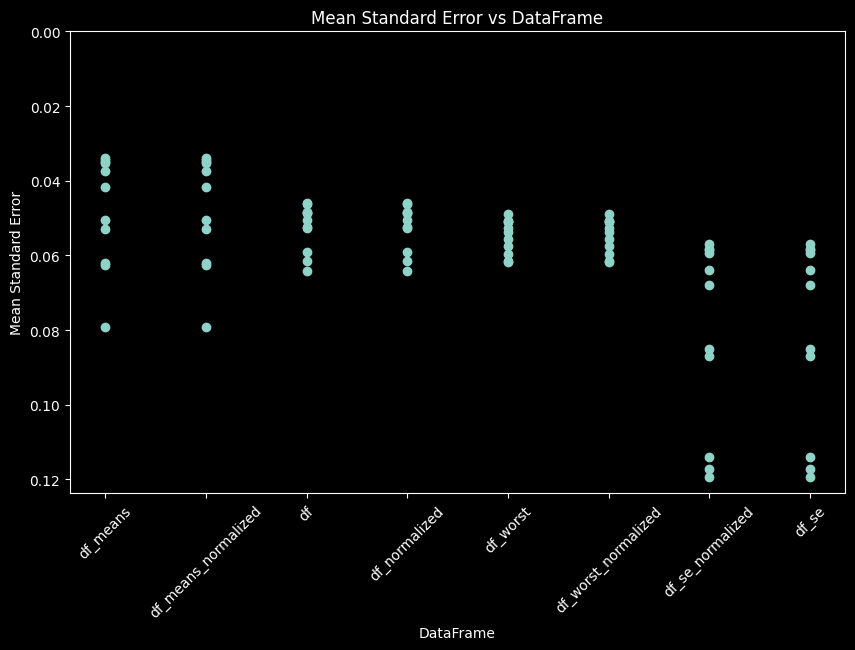

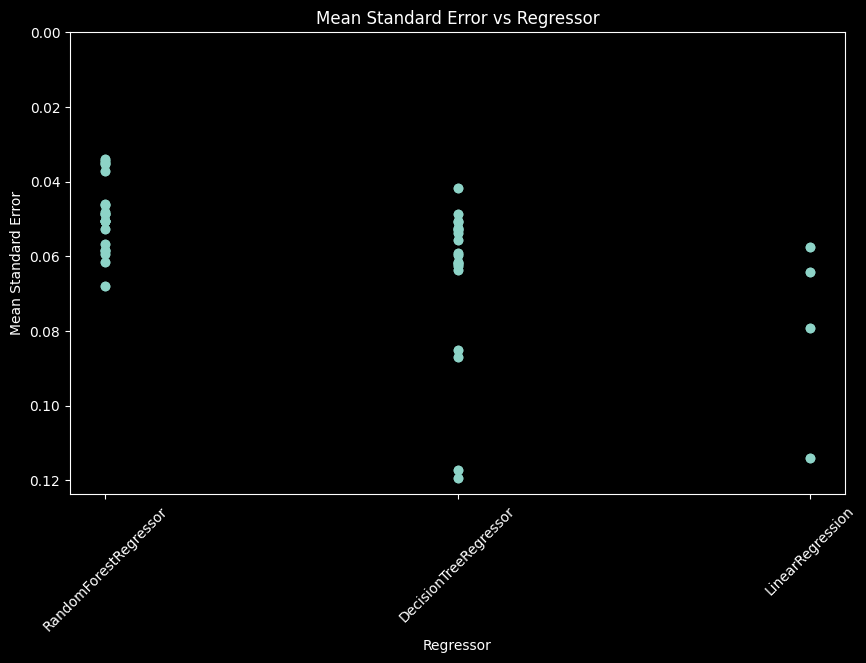

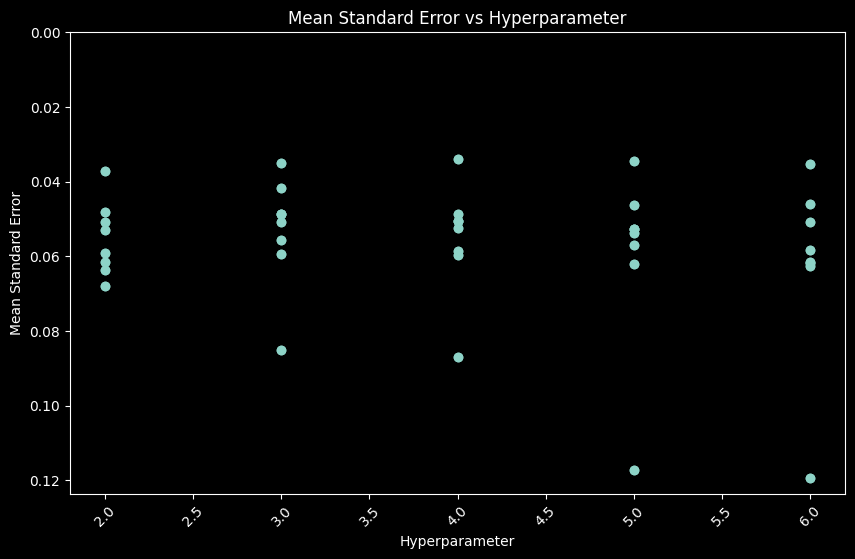

In [193]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

for column in results_df.columns:
    if column != 'MSE':
        plt.figure(figsize=(10, 6))
        plt.scatter(results_df[column], results_df['MSE'])
        plt.xlabel(column)
        plt.xticks(rotation=45)  # This line rotates the xlabels 45 degrees
        plt.ylabel('Mean Standard Error')
        plt.ylim(bottom=0)  # This line makes y always start at 0
        plt.title(f'Mean Standard Error vs {column}')
        plt.gca().invert_yaxis()  # This line inverts the y-axis
        plt.show()
    


In [194]:
from sklearn.metrics import mean_squared_error

# Assuming randomtrees_200 is your trained RandomForestRegressor model
# And it has been trained like this:
randomtrees_200 = RandomForestRegressor(n_estimators=200, random_state=42)
randomtrees_200.fit(X_train, y_train)

# Predict on training data
train_preds = randomtrees_200.predict(X_train)

# Predict on testing data
test_preds = randomtrees_200.predict(X_test)

# Calculate the mean squared error on training data
train_mse = mean_squared_error(y_train, train_preds)

# Calculate the mean squared error on testing data
test_mse = mean_squared_error(y_test, test_preds)

# Print the mean squared errors
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

Training MSE: 0.004911868131868131
Testing MSE: 0.03779078947368421


This shows our model may be overfitted, and we can reduce overhead and improve precision by reducing estimators📊. We do and plot to check the best model for precision vs overfitting📈:


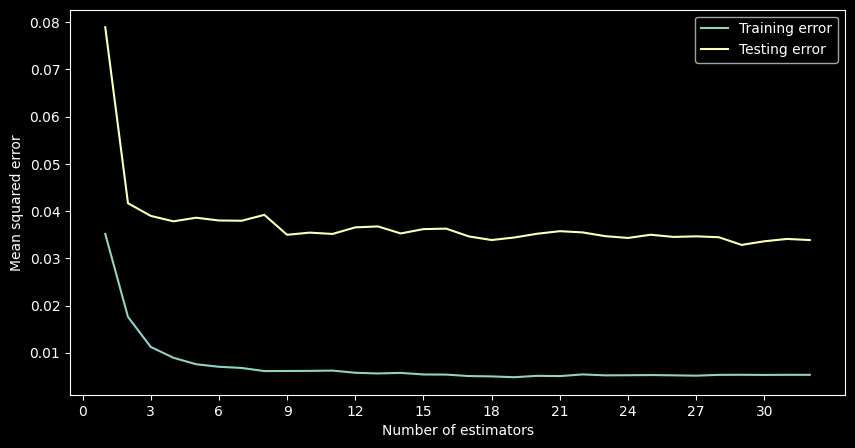

In [201]:
# List of numbers of estimators
n_estimators = list(range(1, 33))

# Lists to store the mean squared errors
train_errors = []
test_errors = []

# Train a model for each number of estimators
for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=45)
    model.fit(X_train, y_train)
    
    # Predict and calculate the mean squared error on training data
    train_preds = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_errors.append(train_mse)
    
    # Predict and calculate the mean squared error on testing data
    test_preds = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_preds)
    test_errors.append(test_mse)

# Plot the training and testing errors
plt.figure(figsize=(10, 5))
plt.plot(n_estimators, train_errors, label='Training error')
plt.plot(n_estimators, test_errors, label='Testing error')
plt.xlabel('Number of estimators')
plt.xticks(range(0, 33, 3))
plt.ylabel('Mean squared error')
plt.legend()
plt.show()


🎯 It seems our sweet-spot lies around 9 estimators. 

👩‍💻 As such, we should train our Tumor-Analyzing algorithm as a Random Forest Regressor (to a depth of 9 estimators), using the non-normalized means of the data for each patient, for an algorithm with a ~97% precision. 📈


#### Thank you for reading this Jupyter Notebook. If you have any questions or need further clarification, feel free to ask. Happy coding!
